In [1]:
# Run this cell once when starting on notebook.
# On Google Colab, wait for the Google Drive permission prompts before proceeding
import matplotlib.pyplot as plt
%matplotlib inline
import os
import sys
try:
    %load_ext jupyter_ai_magics
except:
    print("%%ai cells will not work in this notebook")
    print("Please use Gemini for AI queries instead")
from datascience import *
import numpy as np
import math

DATA_FOLDER="data/"
try:
  from google.colab import drive
  drive.mount('/content/drive', force_remount=True)
  !mkdir -p /content/data
  !gdown --folder https://drive.google.com/drive/folders/1XifjqyxFHvjK6nOUi4doYsG12hGPhOcI?usp=drive_link -O /content/data
  DATA_FOLDER = DATA_FOLDER.replace("data/", "/content/data/")
  !ls -l /content/data
except:
  print("Google Drive not mounted; this is normal on Jupyter Hub")


%%ai cells will not work in this notebook
Please use Gemini for AI queries instead
Mounted at /content/drive
Retrieving folder contents
Processing file 1hOMU36QJH-8E1xMqZqick7tdYPtRqXWc codes.csv
Processing file 1-pQmPDnV44eDEVIOm_dglgktbO1ng7pe data_science_salaries_raw.csv
Processing file 1Cl56p5ygZPsG_TdGagMpd2wxMAnsNUN0 ucsb-f25-courses.csv
Processing file 1A6TJBGq7Fg5eO_4XrHgrRRM27RRxB6w7 ucsb-m25-courses.csv
Processing file 1KqFgPgttI11ADhBdGWipQ4RaCyM7S8iZ ucsb-s25-courses.csv
Processing file 1DHBdvECi_-cQtiJ1FZl4v_JfLgAMrauE world_happiness_2015.csv
Processing file 10lU_ehl4CmZqXZ8Ow4tz_G4zHvB9kkwV world_happiness_2019.csv
Processing file 17-CMnZGvqhCNc4_dzlS86njmmPWl_c2g world_university_rankings.csv
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1hOMU36QJH-8E1xMqZqick7tdYPtRqXWc
To: /content/data/codes.csv
100% 6.40k/6.40k [00:00<00:00, 22.0MB/s]
Downloading...
From: 



```
# This is formatted as code
```

# Lecture 17, CMPSC 5A, S25

Tue 05/27/2025, Week 9

Google Colab versions of lecture notebooks can be found in this folder:
* <https://drive.google.com/drive/folders/1jS1Fa0BpGUVaijXwIYX0I21Un6XOGQM-?usp=sharing>

Note that the Google Colab version will have any updates made during class, while the copy on Jupyter Hub may not.



## ic27 Participation Assignment

Just one today, on Gradescope as [ic27](https://www.gradescope.com/courses/1014383/assignments/6284213/submissions)




# Where are we in the reading?

By today, you should have finished reading:

* [Chapter 1: What is Data Science](https://inferentialthinking.com/chapters/01/what-is-data-science.html)
* [Chapter 2 Causality and Experiments](https://inferentialthinking.com/chapters/02/causality-and-experiments.html)
* [Chapter 3: Programming in Python](https://inferentialthinking.com/chapters/03/programming-in-python.html)
* [Chapter 4: Data Types](https://inferentialthinking.com/chapters/04/Data_Types.html)
* [Chapter 5: Sequences](https://inferentialthinking.com/chapters/05/Sequences.html)
* [Chapter 6: Tables](https://inferentialthinking.com/chapters/06/Tables.html)
* [Chapter 7: Visualization](https://inferentialthinking.com/chapters/07/Visualization.html)
* [Chapter 8: Functions and Tables (Intro)](https://inferentialthinking.com/chapters/08/Functions_and_Tables.html)
* [Chapter 9: Randomness](https://inferentialthinking.com/chapters/09/Randomness.html)
* [Chapter 10 (Sampling and Empirical Distributions)](https://inferentialthinking.com/chapters/10/Sampling_and_Empirical_Distributions.html)
* [Chapter 14 (intro, Why the Mean Matters)](https://inferentialthinking.com/chapters/14/Why_the_Mean_Matters.html)
* [Section 14.1, (Properties of the Mean)](https://inferentialthinking.com/chapters/14/1/Properties_of_the_Mean.html)
* [Section 14.2, (Variability)](https://inferentialthinking.com/chapters/14/2/Variability.html)
* [Section 15.1, (Correlation)](https://inferentialthinking.com/chapters/15/1/Correlation.html)



*New Reading for Today, Tuesday (week 9, 05/27):*

* [Chapter 11 (Testing Hypotheses, including p-values)](https://inferentialthinking.com/chapters/11/Testing_Hypotheses.html)

New Reading for Thursday (week 9, 05/29):
* [Chapter 12 (Comparing Two Samples, including A/B testing)](https://inferentialthinking.com/chapters/11/Testing_Hypotheses.html)

Unless I update you otherwise, this is all the reading for the quarter.



# Logistics

- There will be no lab06
- You will have the option to resubmit lab04 or lab05 if you are not satisfied with your score or have a missed submission.
  - However, the highest score for your resubmission will be 60/100
- Select your final project group on Canvas, similar to the midterm. Your group members do not have to be in your section for the final
  - This will be part of today's attendance check
- Final projects will be released this week (hopefully by this tomorrow), and you should have time during section tomorrow to get started

# Review

So far, we’ve just learned that correlation helps us measure relationships between variables.

For example, how strongly ice cream sales and temperature rise together would likely represent a positive correlation, as one variable increases so does the other. Similarly we could have a negative correlation, between TV time and test scores. One may find that as entertainment time goes up, test score performance decreases.

But correlation alone doesn’t tell us if one thing is actually causing the other, or if it’s just a coincidence.

The goal for our lecture today is to build an understanding of how we can gauge whether a certain set of observed data points (distribution) is unusual enough that it likely didn’t happen just by chance; or whether it's the kind of result we’d expect to see even if nothing special were going on.

In the previous lecture we discussed how we can assess whether a certain set of observations falls within a model.

Specifically, we looked at the process of jury selection in Alabama 1962.




* At the time of the trial, only men aged 21 or more were eligible to serve on juries in Talladega County.
* Jury was chosen from panel of 100 men.
* 8 of those jurors were black (i.e. 8%)
* 26% of the men eligible to serve on juries were black

The question:

* If the jury process is unbiased and representative, you'd expect "on average" to have 26 black men on every jury panel of 100.
* But it wouldn't be exactly 26; there' would be some variation due to random chance.

But: how often would you get 8 out of 100 if the expected number is 26?, *and* if the process were fair and impartial?

## Choice of a statistic:

"A natural statistic, then, is the number or count of Black panelists in the sample. Small values of the statistic would mean there is likely a chance of bias.

Now let's review the code that we can use to answer our original question on whether the jury selection from the case in Alabama 1962 was fair and impartial.

Picking a jury involves sampling the entire population that is eligible to serving on the jury.

In [2]:
sample_size = 100
eligible_population = [0.26, 0.74]

Based on the eligible population, one would **EXPECT** the distribution of the jury to match the distribution of eligibile jurors.

In [3]:
expected_distribution = sample_size * make_array(*eligible_population)

print("Expected # of Black Men on Jury: \t{}".format(int(expected_distribution[0])))
print("Expected # of Non-Black Men on Jury: \t{}".format(int(expected_distribution[1])))

Expected # of Black Men on Jury: 	26
Expected # of Non-Black Men on Jury: 	74


However, picking a jury is a random sample from the eligible jurors and may not exactly match the expected outcome. We can use the `sample_proportions` function to simulate the process of random sampling for a certain distribution.  

In this case we want to select 100 jurors (`sample_size`) with the distribution (`eligible_population`) that 26% of the eligible jurors are black males and 74% of the jurors are not black.

In [4]:
sample_size = 100
eligible_population = [0.26, 0.74]

sampled_distribution = sample_size * sample_proportions(sample_size, eligible_population)
print("Observed # of Black Men on Jury: \t{}".format(int(sampled_distribution[0])))
print("Observed # of Non-Black Men on Jury: \t{}".format(int(sampled_distribution[1])))

Observed # of Black Men on Jury: 	24
Observed # of Non-Black Men on Jury: 	76


Note that if we run the above cell many times we observe that the distribution changes within each sample.

For each sample distribution we have a count for the observed number of jurors that were black men.

We can use a group of sample distributions, by running this code many times, to form a probability distribution for the number of jurors that are black men given the distribution within the eligible population (26% of population is black men).

A probability distribution will convey the likelihood that the `Observed # of Black Men on Jury` is equal to a certain value.

In [5]:
sample_size = 100
eligible_population = [0.26, 0.74]

def one_simulated_count():
    return sample_size * sample_proportions(sample_size, eligible_population).item(0)

counts = make_array()
repetitions = 10000
for i in np.arange(repetitions):
    counts = np.append(counts, one_simulated_count())

counts

array([ 21.,  29.,  26., ...,  23.,  26.,  22.])

**Question**: What kind of graphs could we use to visualize a probability distribution? Why?

Text(0, 0.5, 'Proportion per Unit')

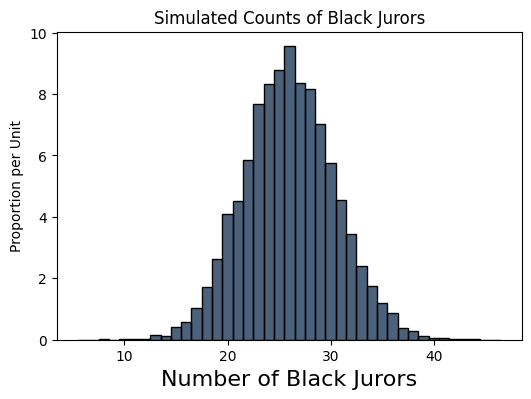

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np


Table().with_column(
    'Count in a Random Sample', counts
).hist(bins = np.arange(5.5, 46.6, 1))


plt.title('Simulated Counts of Black Jurors')
plt.xlabel('Number of Black Jurors')
plt.ylabel('Proportion per Unit')


Great, now we have a probability distribution (over all 10,000 sampled distributions) for the number of black men selected as jurors.

Now we can visualize where our specific observation from the Alabama case in 1962 falls on this probability distribution.

We use the `scatter` function from matplotlib to add a single red point to the plot to indicate the number of selected jurors that were black men is equal to 8. `plt.scatter(8, 0, color='red', s=30)`

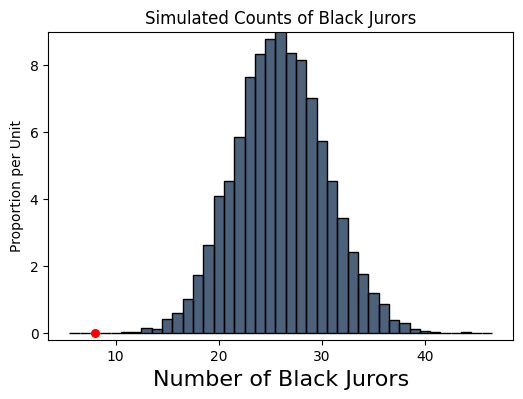

In [7]:
import matplotlib.pyplot as plt
import numpy as np
Table().with_column(
    'Count in a Random Sample', counts
).hist(bins = np.arange(5.5, 46.6, 1))
plt.title('Simulated Counts of Black Jurors')
plt.xlabel('Number of Black Jurors')
plt.ylabel('Proportion per Unit')

plt.ylim(-0.002, 0.09)
plt.scatter(8, 0, color='red', s=30);
plt.show()

From this histogram we can see the proportion of our 10000 simulations where the number of black jurors was a specific value.

The red point indicates what the observed number of black jurors was in the specific trial we observed in Alabama 1962.

**Conclusion**: We observe that over the 10000 simulations, not a single one ever ended up with only 8 jurors that were black men, meaning that we can likely conclude that the jury for the trial was biased.



Through this process we were able to conclude that the claim (or hypothesis) that the jury selection process for the Alabama 1962 case was fair and impartial is **NOT** true. In other words, we concluded that the jury selection process was biased and unfair.

Hypothesis testing provides a structured way to evaluate claims about a population or process. It allows us to quantify uncertainty (by incorporating probability that provides evidence for whether something is true or whether observed data is consistent with a claim). Many real-world decisions depend on binary outcomes such as accepting or rejecting a claim, approving or disapproving a new policy, and this framework supports that.


Specifically, we were testing out our hypotheses, the null hypothesis and the alternative hypothesis, about whether the process of jury selection in this Alabama 1962 case was fair and impartial.

Why two hypotheses? It's like a courtroom analogy: The **null hypothesis** is like "innocent until proven guilty". The **alternative hypothesis** is the claim of guilt. You need strong evidence (data) to reject the null hypothesis in favor of the alternative.



Let's understand this further:

1. **The null hypothesis** acts as a sort of "status quo" or "no effect" statement. Its the default or starting assumption. It says that nothing unusual or unexpected is happening, and any differences we see in the data are just due to random chance. For example, if you roll a die, the null hypothesis might be: The die is fair (each number has an equal chance of 1/6). The word “null” reinforces the idea that if the data look different from what the null hypothesis predicts, the difference is due to nothing but chance. From a practical perspective, the null hypothesis is a hypothesis under which you can simulate data. Under this hypothesis, we can simulate random samples by using say `sample_proportions`.

It serves as the default or baseline assumption that there is no significant effect, relationship, or difference in the population parameters being studied. In simpler terms, the null hypothesis (often denoted as **H0**) represents the idea that any observed differences or patterns in your data are purely due to random chance or sampling variability. For example, if you are comparing the mean scores of two groups, the null hypothesis might state that there is no significant difference in the means of the two groups.


    
2. **The alternative hypothesis** In the context of data science, it is a statement that contradicts the null hypothesis. It is the opposite of the null hypothesis. It says that there is something unusual or unexpected going on—there’s a real effect or difference. It’s the hypothesis we’re trying to find evidence for! In other words, this says that some reason other than chance made the data differ from the predictions of the model in the null hypothesis. For example, if you roll a die, the alternative hypothesis might be: The die is not fair (it is biased/the chances of each number are not equal).

It represents the researcher's specific claim or expectation about the population parameters being studied. Unlike the null hypothesis, the alternative hypothesis (often denoted as **H1**) asserts that there is a significant effect, relationship, or difference in the data. In simpler terms, the alternative hypothesis is what researchers are trying to find evidence for. For example, if you are conducting a study comparing the mean scores of two groups, the null hypothesis might state that there is no significant difference in the means, while the alternative hypothesis would assert that there is a specific difference in the means.


**Question**: What is the null hypothesis in the above juror example?

**Question**: What is the alternative hypothesis in the above juror example?

**Any questions so far?**

# [Section 11.2: Multiple Categories](https://inferentialthinking.com/chapters/11/2/Multiple_Categories.html)


"The focus of the study by the ACLU of Northern California was the racial and ethnic composition of jury panels in Alameda County. The ACLU compiled data on the composition of the jury panels in 11 felony trials in Alameda County in the years 2009 and 2010. "

Now, instead of just "black" and "white", we are looking at:

```
('Asian/PI', 'Black/AA', 'Caucasian', 'Hispanic', 'Other')
```

But it's the same basic question: are the juries selected in a way that is representative of the population, or is there inherent bias?

In the previous example we only considered a single value (26%) as the proportion of eligible jurors that were black men. In this example we now have a proportion for each category.


In [8]:
jury = Table().with_columns(
    'Ethnicity', make_array('Asian/PI', 'Black/AA', 'Caucasian', 'Hispanic', 'Other'),
    'Eligible', make_array(0.15, 0.18, 0.54, 0.12, 0.01),
    'Panels', make_array(0.26, 0.08, 0.54, 0.08, 0.04)
)
jury

Ethnicity,Eligible,Panels
Asian/PI,0.15,0.26
Black/AA,0.18,0.08
Caucasian,0.54,0.54
Hispanic,0.12,0.08
Other,0.01,0.04


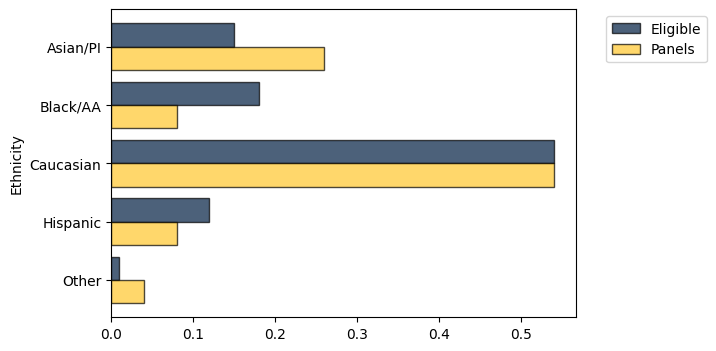

In [ ]:
jury.barh('Ethnicity')

Now over these 11 felony trials, let us consider choosing a sample of 1100 people for 100 people each to serve on the 11 juries, following a similar approach to the previous example.

In [9]:
eligible_population = jury.column('Eligible')
eligible_population

array([ 0.15,  0.18,  0.54,  0.12,  0.01])

In [10]:
eligible_population = jury.column('Eligible')
sample_distribution = sample_proportions(1100, eligible_population)
panels_and_sample = jury.with_column('Random Sample', sample_distribution)
panels_and_sample

Ethnicity,Eligible,Panels,Random Sample
Asian/PI,0.15,0.26,0.156364
Black/AA,0.18,0.08,0.157273
Caucasian,0.54,0.54,0.573636
Hispanic,0.12,0.08,0.102727
Other,0.01,0.04,0.01


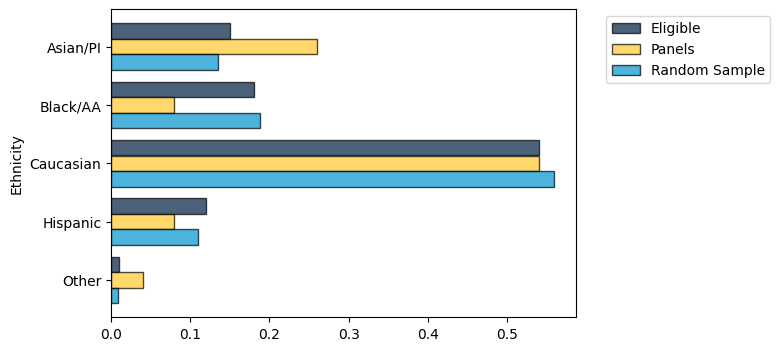

In [11]:
eligible_population = jury.column('Eligible')
sample_distribution = sample_proportions(1100, eligible_population)
panels_and_sample = jury.with_column('Random Sample', sample_distribution)
panels_and_sample.barh('Ethnicity')

We can see that the blue bars (random sample vs. eligible jurors) are always similar to each other, even when we run this many times.

**Sanity Check**: Why is this the case?

Note that the light blue bar represents a single randomly sampled distribution. In the previous example, our next step would be to generate a group of randomly sample distributions and then observe the probability distribution.


In [12]:
sample_size = 1100
eligible_population = jury.column('Eligible')
index = 3

def one_simulated_count():
    return sample_size * sample_proportions(sample_size, eligible_population).item(index)

counts = make_array()
repetitions = 10000
for i in np.arange(repetitions):
    counts = np.append(counts, one_simulated_count())

print("Counts for Category Index {}: {}".format(index, jury.column('Ethnicity').take(0)))
counts


Counts for Category Index 3: Asian/PI


array([ 138.,  130.,  127., ...,  136.,  132.,  142.])

In [13]:
print(np.min(counts))
print(np.max(counts))

94.0
177.0


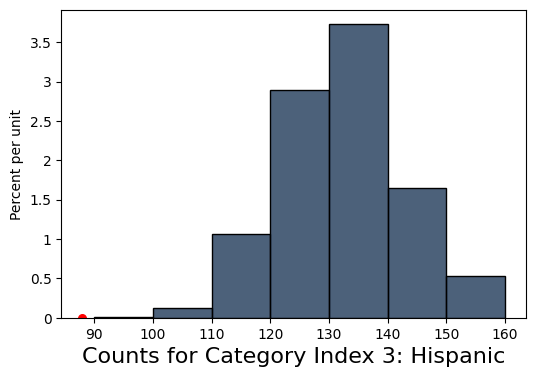

In [14]:
Table().with_column(
    'Counts for Category Index {}: {}'.format(index, jury.column('Ethnicity').take(index)), counts
).hist(bins = np.arange((np.min(counts) // 10) * 10, (np.max(counts) // 10) * 10, 10))

plt.scatter(jury.column('Panels').take(index) * sample_size, 0, color='red', s=30);
plt.show()

Through this process we can iterate through each category to understand whether the observed statistic fall within our probability distribution.

But how can we tell if two distributions are similar overall, not just in one statistic? To do that, we need a way to measure how far apart entire distributions are, a kind of distance metric.

In [15]:
# Augment the table with a column of differences between proportions

jury_with_diffs = jury.with_column(
    'Difference', jury.column('Panels') - jury.column('Eligible')
)
jury_with_diffs

Ethnicity,Eligible,Panels,Difference
Asian/PI,0.15,0.26,0.11
Black/AA,0.18,0.08,-0.1
Caucasian,0.54,0.54,0
Hispanic,0.12,0.08,-0.04
Other,0.01,0.04,0.03


In [16]:
jury_with_diffs = jury_with_diffs.with_column(
    'Absolute Difference', np.abs(jury_with_diffs.column('Difference'))
)

jury_with_diffs

Ethnicity,Eligible,Panels,Difference,Absolute Difference
Asian/PI,0.15,0.26,0.11,0.11
Black/AA,0.18,0.08,-0.1,0.1
Caucasian,0.54,0.54,0,0
Hispanic,0.12,0.08,-0.04,0.04
Other,0.01,0.04,0.03,0.03


In [17]:
jury_with_diffs.column('Absolute Difference').sum() / 2

0.14000000000000001

In [18]:
def total_variation_distance(distribution_1, distribution_2):
    return sum(np.abs(distribution_1 - distribution_2)) / 2

In [19]:
total_variation_distance(jury.column('Panels'), jury.column('Eligible'))

0.14000000000000001

In [20]:
sample_distribution = sample_proportions(1453, eligible_population)
total_variation_distance(sample_distribution, eligible_population)

0.016620784583620131

In [21]:
def one_simulated_tvd():
    sample_distribution = sample_proportions(1453, eligible_population)
    return total_variation_distance(sample_distribution, eligible_population)

In [24]:
tvds = make_array()
repetitions = 10000
for i in np.arange(repetitions):
    tvds = np.append(tvds, one_simulated_tvd())

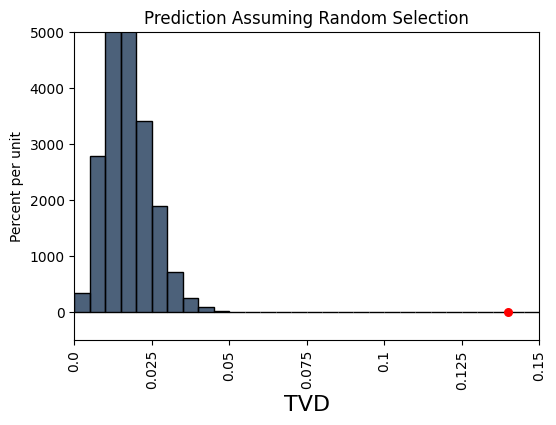

In [25]:
Table().with_column('TVD', tvds).hist(bins=np.arange(0, 0.2, 0.005))

plt.title('Prediction Assuming Random Selection')
plt.xlim(0, 0.15)
plt.ylim(-5, 50)
plt.scatter(0.14, 0, color='red', s=30);

Note in the above graph, the y-axis represents the absolute number of repititions that has a value that falls into the bin. This is due to how the datascience library normalizes the graph based on the size of the bins.

In both of these examples it's pretty clear that the alternative hypothesis is more likely to be true since the observed test statistic significantly differs from the null hypothesis.

Let's look at an example that may not be so obvious concerning university rankings that we've looked at before.

In [28]:
university_rankings = Table().read_table("data/world_university_rankings.csv")
university_rankings

rank,ranking-institution-title,location,Overall scores,Research Quality Score,Industry Score,International Outlook,Research Environment Score,Teaching Score
1,Massachusetts Institute of Technology,United States,94.8,92.2,99.9,89.6,96.5,96
2,Stanford University,United States,93.1,91.9,100,83.5,91.8,98.2
3,University of Oxford,United Kingdom,91.3,81.7,89.4,94.5,97.4,93.5
4,"University of California, Berkeley",United States,90.6,95.2,90.6,83.5,92.7,91.1
5,Peking University,China,90.4,74.5,95.4,94,91.8,96.3
6,Tsinghua University,China,89.6,82.5,99.5,77.7,95.2,93.2
7,University of Cambridge,United Kingdom,89.4,86.6,76.7,95.4,94.6,93.8
8,ETH Zurich,Switzerland,88.3,87.1,99.5,96.4,83.1,75.2
9,Harvard University,United States,87.1,95.2,69.8,82.1,93.4,95
10,National University of Singapore,Singapore,86.8,79.7,97.9,80.4,95.9,79.9


Let's say you propose the following model that predicts something about American universities: For an American university, there is a 68% chance that it has an overall score that is higher than the average overall score of all the universities. Now, you want to check if this claim matches reality by testing it with data!

To test your claim, you set up two competing ideas: Let's define our *null* and *alternative* hypotheses.

The *null hypothesis* states that the assumptions of your model are good. In other words, an American university does really have a 68% chance of having an overall score that is higher than the average of all the universities.
The *alternative hypothesis* simply states that the assumptions of your model are not correct, i.e., an American university does **not** have a 68% chance of having an overall score that is higher than the average of all the universities. Simple, right?

We will use our data to perform a test of hypotheses and see if our model looks good.

In [ ]:
average_score_all = np.mean(university_rankings.column('Overall scores'))
average_score_all

44.430769230769229

In [136]:
average_score_all = np.average(university_rankings.column('Overall scores'))
# Filtering the American universities with scores higher than the average (of all universities)
higher_than_average = university_rankings.where('location', are.equal_to('United States')) \
                          .where('Overall scores', are.above(average_score_all))

# Counting the number of American universities that meet the condition
num_higher_than_average = higher_than_average.num_rows

# Counting the number of American universities that don't meet the condition
num_lower_than_average = university_rankings.where('location', are.equal_to('United States')).num_rows - num_higher_than_average

# Creating a new table to display the results
result_table = Table().with_columns([
    'Condition', ['Higher than Average', 'Lower than Average'],
    'Count', [num_higher_than_average, num_lower_than_average]
])

# Displaying the result in markdown format
result_table.show()

Condition,Count
Higher than Average,89
Lower than Average,54


The next step is essentially the step where you quantify the difference between what your model predicts and what you observe in the data. Let's break it down:

A test statistic is a single number that summarizes the data in a way that helps you decide between the null and alternative hypotheses. It measures how far the data is from the null hypothesis prediction.

Using the *total variation distance*:

Your model prediction: 68% of American universities have a score higher than the average.

What you observed: The actual percentage of American universities in your dataset with scores higher than the average.
In this case, the total variational distance comes down to the distance between the sample percent of American universities that have an overall score higher than the average and 68%, which is the corresponding percent in the model you originally assumed. I.e.,

Distance = ∣Observed Percent−68%∣ (This tells you how far the observed percentage is from the 68% predicted by your model)

Next, we collect the required data (in our case, we already have the data), and calculate the *observed value of the statistic*. This is the observed value given our data. It is the specific value of the test statistic derived from the data - its going to be the "red dot" in our plot.

In [ ]:
# observed chance that a US university has overall score above average (in %)
(89/(54+89)) * 100

62.23776223776224

In [ ]:
observed_statistic = abs ( 100 * (89 / 143) - 68)
observed_statistic

5.76223776223776

Observed statistic:

This is the specific value calculated from our observed data. This represents the distance between the observed proportion (62.24%) and the null hypothesis proportion (68%). It is the real-world value we're testing.

Test Statistic:

This is the generic term for the metric we use to measure the difference between our observed data and the null hypothesis. In this case, our test statistic is the absolute distance metric (scaled by 100 for percentage comparison). The test statistic is computed for both the observed data (yielding the observed statistic) and the simulated data under the null hypothesis (in this case, since we are simulating, observe that it can come out to be different for different simulations as expected).

In hypothesis testing:
Small observed statistic (near 0 is best): The sample data aligns closely with the null hypothesis.
Large observed statistic (e.g., 5.76 in our case): The sample data deviates significantly from the null, suggesting evidence for the alternative hypothesis.

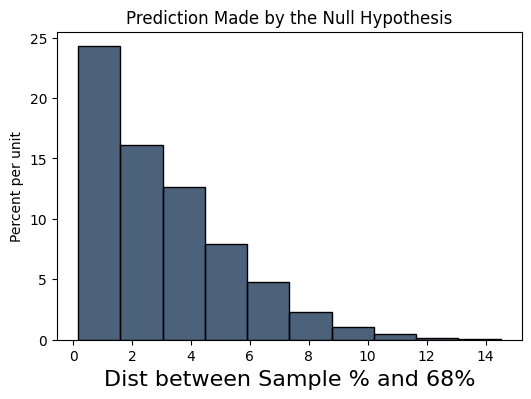

In [137]:
model_proportions = make_array(0.68, 0.32)
model_proportions_pos = model_proportions.item(0)
sample_size = 143

def one_simulated_distance():
    sample_proportion_pos = sample_proportions(143, model_proportions).item(0)
    return 100 * abs(sample_proportion_pos - model_proportions_pos)

repetitions = 10000
distances = make_array()

for i in np.arange(repetitions):
    distances = np.append(distances, one_simulated_distance())


# This is the histogram of the distribution of the test statistic predicted by the null hypothesis.
Table().with_column(
    'Dist between Sample % and 68%', distances
).hist() # rmember that hist by default will bin it into 10 intervals
plt.title('Prediction Made by the Null Hypothesis');

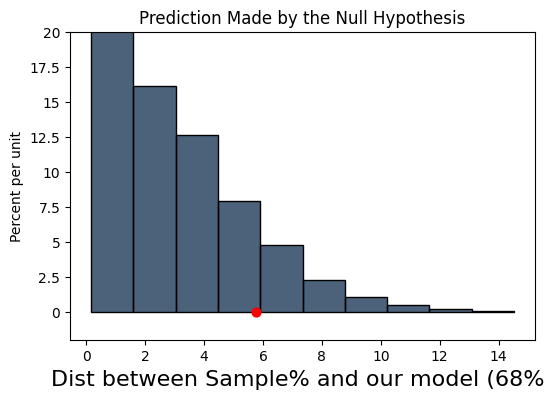

In [138]:
Table().with_column(
    'Dist between Sample% and our model (68%)', distances
).hist()
plt.ylim(-0.02, 0.2) # this is just to help you see the red dot (observed statistic) better
plt.title('Prediction Made by the Null Hypothesis')
plt.scatter(observed_statistic, 0, color='red', s=40);

The observed statistic is like a typical distance predicted by the null hypothesis. Now, from a quick glance, it seems like the null hypothesis is our model (the red dot seems to be in the heart of the distribution). How do we conclude that the data are consistent with our model or in other words, our model looks good?

Hmmm...the answer is not as clear as it was with the jury examples. It depends on whether you think the red dot is too far from the bulk of the predicted values to be consistent with the prediction based on your model. But, thankfully enough we have a way to quantify if 'far' is too far. Enter p-value or observed significance level of a test!

The p-value of a test is the probability, assuming the null hypothesis (in this case, the 68% model) is true, of obtaining a test statistic as extreme as or more extreme than the observed statistic.

A small p-value means that such values are unlikely under the null hypothesis, suggesting the observed statistic deviates significantly from what the null predicts. This provides evidence that the data align more closely with the alternative hypothesis than with the null.

Two Short Videos on P-Values

https://app.jove.com/science-education/v/13611/p-value

https://app.jove.com/science-education/v/13613/decision-making-p-value-method

Common Misinterpretations:  
❌ "p = 0.05 means there's a 5% chance the null hypothesis is true"  
❌ "p = 0.05 means there's a 95% chance the alternative hypothesis is true"  
✅ "If the null hypothesis were true, we'd see results this extreme about 5% of the time  

Now that we know what the *p-value* is, let's calculate it for our problem.

The p-value quantifies how "far" the observed statistic is from the bulk of the null distribution, allowing you to make an objective decision! In other words, the p-value quantifies how surprising or unusual the observed data would be if the null hypothesis were true.

In [139]:
# this is the p-value for our problem!
# If the p-value is less than 5%, it is considered small and the result is called “statistically significant.”
# If the p-value is even smaller – less than 1% – the result is called “highly statistically significant.”
# Typically, along with your conclusion, provide the observed statistic and the p-value as well, so that readers can use their own judgment.
np.count_nonzero(distances >= observed_statistic) / repetitions

0.1499

Under the null hypothesis, about 16% of simulated samples produced a test statistic as extreme as or more extreme than the observed value of 5.76.

Based on what we know now, if we consider the typical threshold of 0.05, that does seem like a big chance indicating that the observed data is reasonably likely to occur by chance alone or in other words, it supports our null hypothesis (that an American university has a 68% chance of having an overall score that is higher than the average of all the universities).

#### You can also think of it this way:
Under the null hypothesis, we assume that the null hypothesis provides an accurate model of the world. This means the observed data (or observed test statistic) should fit within the range of typical values predicted by the null. If the observed test statistic is very far from the values expected under the null (i.e., "extreme"), it suggests that the null may not be a good model for the data.

The p-value is the probability of obtaining a test statistic as extreme as (or more extreme than) the observed statistic if the null hypothesis were true. A small p-value indicates that the observed statistic is unusual under the null, leading us to question whether the null hypothesis is correct. A large p-value suggests the observed statistic is consistent with the null, so there's no reason to reject it.

If the null hypothesis is true, extreme test statistics should rarely happen because they fall into the tails of the null distribution (low probability). When we observe such an extreme value, it casts doubt on the null hypothesis, because either the null hypothesis is wrong, OR something very unusual happened by chance.

**Any Questions?**

# In-Class Assignment

ic27 on gradescope! Make sure to complete this